### II/ Tìm nghiệm bài toán bằng `TensorFlow`

##### 1) (Full) batch gradient descent: đưa toàn bộ X và Y vào để train:

Với cách 1, do đưa toàn bộ batch vào nên gradient ở mỗi vòng lặp ổn định. Cách này được khuyến khích sử dụng khi hàm cost của mình biết rõ là convex (không có nhiều hơn 1 điểm tối ưu cục bộ). Tuy nhiên, đối với những hàm phức tạp, thì cách 1 có thể ko bao giờ đạt tối ưu toàn cục được.

##### 2) Stochastic gradient descent: đưa từng cặp (x, y) trong data X, Y vào để train :

Đối với cách 2, do mình đưa vào từng cặp nên gradient ở mỗi vòng lặp sẽ rất nhiễu (noisy). Chính vì sự nhiễu này mà có trong qúa trình học, nó có thể giúp mô hình vượt qua được các điểm tối ưu cục bộ. Stochastic = random, thể hiện cho sự nhiễu.
##### 3) Mini-batch gradient descent: bốc 1 lượng nhiều hơn 1 mẫu từ X, Y để train.

Cách 3 là sự kết hợp giữa 1 và 2, cũng là cách dùng nhiều nhất trong deep learning. Trong các bài tới sẽ đề cập sau.

Còn về bài tập thì thực ra hàm error của mình hoàn toàn convex nên dùng cách 1 hay 2 đều được. Nhưng cách 2 sẽ lâu hơn. Bạn có thể sửa code lại để kiểm tra thử.

#### Đưa dữ liệu vào

In [1]:
from utils_function import load_Boston_housing_data
import numpy as np

train_X, test_X, train_Y, test_Y = load_Boston_housing_data(feature_ind = [2,5])

Selected original features are ['INDUS' 'RM']


#### Nhập thư viện

In [2]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
tf.enable_eager_execution()

#### Khai báo biến

In [3]:
learning_rate = 0.003
training_epochs = 10000
display_step = 1000
n_samples, dimension = train_X.shape
batch_size = n_samples # Full Batch Gradient Descent

In [4]:
# train_Y
n_samples
dimension

2

#### Bài 6. Khai báo

In [5]:
# TODO: implement input and parameter for tensorflow.
train_X = tf.constant(train_X, dtype=tf.float64)

train_Y = tf.reshape(tensor=train_Y, shape=(-1, 1))
train_Y = tf.constant(train_Y, dtype=tf.float64) # convert train_Y to tensor tf

# Set model weights
W = tfe.Variable(np.random.normal(size=(dimension, 1)), trainable=True) # create weights variable to train. size=(dimension, 1)
b = tfe.Variable(np.random.normal(size=(1, 1)), trainable=True)
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-0.12524595],
       [ 0.28924066]])>
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float64, numpy=array([[0.74741963]])>


#### Bài 7. Xây dựng mô hình hồi quy tuyến tính

$$\hat{y} = Xw + b $$

In [6]:
#TODO: implement a linear regression function
def tf_lr_hypothesis(X, W, b):
    return tf.add(tf.matmul(X, W), b)

#### Bài 8. Viết hàm cost
$$\mathcal{E}(\hat{y}, y) = \frac{1}{2N}\|\bf{\hat{y}} - \bf{y}\|^2$$

In [7]:
#TODO: implement a cost function
def tf_mse_cost(Y_hat, Y):
    return tf.reduce_mean(tf.square(Y_hat - Y))

In [8]:
len(train_Y)

404

#### Bài 9. Viết hàm train

In [9]:
#TODO: implemement GD
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

#### Bài 10. Chạy chương trình

In [10]:
loss_history = []
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        Y_hat = tf_lr_hypothesis(train_X, W, b) # apply linear regression function here
        mse_cost = tf_mse_cost(Y_hat, train_Y) # apply mse cost here.
    grads = tape.gradient(mse_cost, [W, b])
    optimizer.apply_gradients(zip(grads, [W, b]))
    if (epoch + 1) % display_step == 0:
        loss_history.append(mse_cost.numpy())
        print("Epoch:", epoch + 1, "| Cost:", mse_cost.numpy())

Epoch: 1000 | Cost: 41.41599071977166
Epoch: 2000 | Cost: 40.993620578385936
Epoch: 3000 | Cost: 40.61167607154095
Epoch: 4000 | Cost: 40.266288005446924
Epoch: 5000 | Cost: 39.95395751224108
Epoch: 6000 | Cost: 39.67152060557725
Epoch: 7000 | Cost: 39.416116128649435
Epoch: 8000 | Cost: 39.18515676995482
Epoch: 9000 | Cost: 38.97630285317832
Epoch: 10000 | Cost: 38.787438635683834


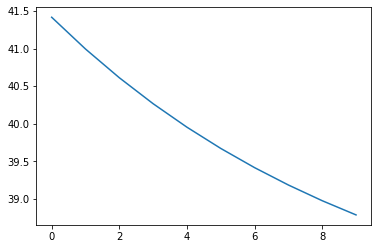

In [11]:
import matplotlib.pyplot as plt

plt.plot(loss_history[:])
plt.show()